In [81]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [82]:
X_train = np.load("/content/drive/MyDrive/verisetleri/X_train.npy")
X_test = np.load("/content/drive/MyDrive/verisetleri/X_test.npy")
X_val = np.load("/content/drive/MyDrive/verisetleri/X_val.npy")
y_train = np.load("/content/drive/MyDrive/verisetleri/y_train.npy")
y_test = np.load("/content/drive/MyDrive/verisetleri/y_test.npy")
y_val = np.load("/content/drive/MyDrive/verisetleri/y_val.npy")

In [83]:
X_train[1].shape

(128, 128, 1)

In [84]:
#Model oluşturulması

model = tf.keras.Sequential()

In [85]:
# Convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape = (128,128,1)))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding = "same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding = "same",
                                 activation="relu"))

In [86]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [87]:
# Dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [88]:
# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [89]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 flatten_7 (Flatten)         (None, 65536)            

In [90]:
model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [91]:
# Train the model for 20 epochs with batch size of 64
results = model.fit(X_train,y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
110/110 [==============================] - 5s 33ms/step - loss: 5.0947 - accuracy: 0.1825 - val_loss: 1.9893 - val_accuracy: 0.3089
Epoch 2/20
110/110 [==============================] - 3s 32ms/step - loss: 2.0041 - accuracy: 0.2793 - val_loss: 1.7753 - val_accuracy: 0.4062
Epoch 3/20
110/110 [==============================] - 3s 32ms/step - loss: 1.8766 - accuracy: 0.3436 - val_loss: 1.7248 - val_accuracy: 0.4256
Epoch 4/20
110/110 [==============================] - 4s 32ms/step - loss: 1.6433 - accuracy: 0.4155 - val_loss: 1.3073 - val_accuracy: 0.5549
Epoch 5/20
110/110 [==============================] - 4s 32ms/step - loss: 1.4105 - accuracy: 0.4880 - val_loss: 1.1555 - val_accuracy: 0.6076
Epoch 6/20
110/110 [==============================] - 3s 31ms/step - loss: 1.2046 - accuracy: 0.5568 - val_loss: 1.0025 - val_accuracy: 0.6522
Epoch 7/20
110/110 [==============================] - 3s 31ms/step - loss: 1.0596 - accuracy: 0.6120 - val_loss: 0.9333 - val_accuracy: 0.6785

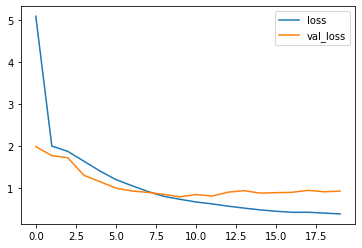

In [92]:
# Plot the the training loss
plt.plot(results.history["loss"],label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"],label="val_loss")

# Name the x and y axises
plt.xlabel=("Epoch")
plt.ylabel=("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

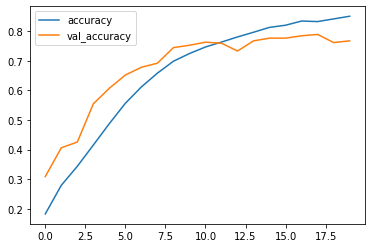

In [93]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"],label="val_accuracy")


# Name the x and y axises
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [94]:
# Evaluate the performance
model.evaluate(X_test,y_test)

28/28 [==============================] - 0s 9ms/step - loss: 0.9204 - accuracy: 0.7755


[0.9203689098358154, 0.7754868268966675]

# Hyperparameter optimization

Batch_size ve epochs değerleri değiştirilmiştir.

In [116]:
model_2 = tf.keras.Sequential()

In [117]:
# Add a convolution and max pooling layer
model_2.add(tf.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape = (128,128,1)))
model_2.add(tf.keras.layers.MaxPool2D((2,2)))

model_2.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding = "same",
                                 activation="relu"))
model_2.add(tf.keras.layers.MaxPooling2D((2,2)))

model_2.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding = "same",
                                 activation="relu"))

In [118]:
model_2.add(tf.keras.layers.Flatten())

In [119]:
model_2.add(tf.keras.layers.Dense(64, activation = "relu"))
model_2.add(tf.keras.layers.Dropout(0.5))

In [120]:
model_2.add(tf.keras.layers.Dense(10, activation = "softmax"))

In [121]:
model_2.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [122]:
results_2 = model_2.fit(X_train, y_train, batch_size = 128, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
55/55 [==============================] - 5s 92ms/step - loss: 3.9705 - accuracy: 0.3125 - val_loss: 1.3220 - val_accuracy: 0.5629
Epoch 2/30
55/55 [==============================] - 5s 89ms/step - loss: 1.3761 - accuracy: 0.5380 - val_loss: 1.0061 - val_accuracy: 0.7117
Epoch 3/30
55/55 [==============================] - 5s 88ms/step - loss: 1.0421 - accuracy: 0.6467 - val_loss: 0.8309 - val_accuracy: 0.7529
Epoch 4/30
55/55 [==============================] - 5s 89ms/step - loss: 0.8389 - accuracy: 0.7128 - val_loss: 0.7298 - val_accuracy: 0.7929
Epoch 5/30
55/55 [==============================] - 5s 89ms/step - loss: 0.7361 - accuracy: 0.7495 - val_loss: 0.6910 - val_accuracy: 0.7975
Epoch 6/30
55/55 [==============================] - 5s 90ms/step - loss: 0.6393 - accuracy: 0.7775 - val_loss: 0.6714 - val_accuracy: 0.8158
Epoch 7/30
55/55 [==============================] - 5s 90ms/step - loss: 0.5476 - accuracy: 0.8092 - val_loss: 0.6883 - val_accuracy: 0.8032
Epoch 8/30
55

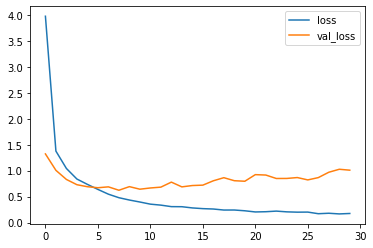

In [123]:
# Plot the the training loss
plt.plot(results_2.history["loss"],label="loss")

# Plot the the validation loss
plt.plot(results_2.history["val_loss"],label="val_loss")

# Name the x and y axises
plt.xlabel=("Epoch")
plt.ylabel=("Loss")

# Put legend table
plt.legend()

# Show the plot
plt.show()

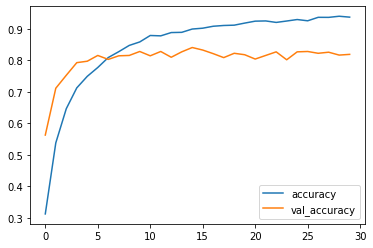

In [124]:
# Plot the the training accuracy
plt.plot(results_2.history["accuracy"],label="accuracy")

# Plot the the validation accuracy
plt.plot(results_2.history["val_accuracy"],label="val_accuracy")


# Name the x and y axises
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [125]:
# Evaluate the performance
model_2.evaluate(X_test,y_test)

28/28 [==============================] - 0s 13ms/step - loss: 0.9316 - accuracy: 0.8213


[0.9315868020057678, 0.8213058710098267]